In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('mbti_1.csv')

In [3]:
dataset.head(20)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
dataset.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,"'INTP?? I don't know, I think he's hard to typ..."
freq,1832,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
personality, rem = train_test_split( dataset, random_state=42, test_size=0.01, stratify=dataset["type"])

In [8]:
personality.to_csv("personal.csv",index=False)

In [9]:
rem.to_csv("rem.csv",index=False)

In [10]:
print(personality["type"].value_counts())

INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: type, dtype: int64


In [11]:
print(rem["type"].value_counts())

INFP    18
INFJ    15
INTP    13
INTJ    11
ENTP     7
ENFP     7
ISTP     3
ISFP     3
ISTJ     2
ENTJ     2
ENFJ     2
ISFJ     2
ESFP     1
ESTP     1
Name: type, dtype: int64


In [12]:
personality_test=pd.read_csv("personal.csv")

In [13]:
personality_test.head()

,type,posts
0,INFJ,'When asked of the things you wish you did ear...
1,INFJ,'I love both and they are equally important to...
2,INFJ,Really? You think implying that everyone who i...
3,ENFJ,'Love is a crazy thing. Se is our best form ...
4,INTP,'I am a physics undergrad with a computation e...


In [14]:
personality_test.shape

(8588, 2)

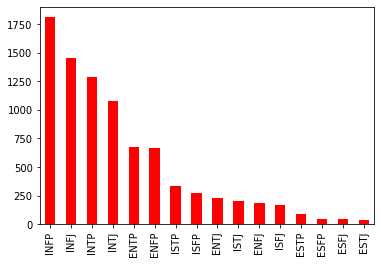

In [15]:
personality_test["type"].value_counts().plot(kind="bar",color="red")
plt.show()

In [16]:

personality_test["Extrovert"] = personality_test["type"].apply(lambda x: 1 if x[0] == "E" else 0)
personality_test["Sensing"] = personality_test["type"].apply(lambda x: 1 if x[1] == "S" else 0)
personality_test["Thinking"] = personality_test["type"].apply(lambda x: 1 if x[2] == "T" else 0)
personality_test["Judging"] = personality_test["type"].apply(lambda x: 1 if x[3] == "J" else 0)

In [17]:
personality_test = personality_test[["type", "Extrovert", "Sensing", "Thinking", "Judging", "posts"]]
personality_test.head()

,type,Extrovert,Sensing,Thinking,Judging,posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...


In [18]:
icount = personality_test["Extrovert"].value_counts()[0]
print(f"Introvert Count is : {icount}")

Introvert Count is : 6609


In [19]:
ecount = personality_test["Extrovert"].value_counts()[1]
print(f"Extrovert Count is: {ecount}")

Extrovert Count is: 1979


In [20]:
incount = personality_test["Sensing"].value_counts()[0]
print(f"Intuition Count is: {incount}")

Intuition Count is: 7403


In [21]:
scount = personality_test["Sensing"].value_counts()[1]
print(f"Sensing Count is: {scount}")

Sensing Count is: 1185


In [22]:
fcount = personality_test["Thinking"].value_counts()[0]
print(f"Feeling Count is: {fcount}")

Feeling Count is: 4646


In [23]:
tcount = personality_test["Thinking"].value_counts()[1]
print(f"Thinking Count is: {tcount}")

Thinking Count is: 3942


In [24]:
pcount = personality_test["Judging"].value_counts()[0]
print(f"Perceiving Count is: {pcount}")

Perceiving Count is: 5188


In [25]:
jcount = personality_test["Judging"].value_counts()[1]
print(f"Judging Count is: {jcount}")

Judging Count is: 3400


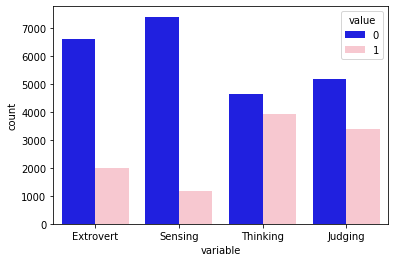

In [26]:
sns.countplot( x="variable",hue="value",data=pd.melt(personality_test[["Extrovert", "Sensing", "Thinking", "Judging"]]),palette=["blue", "pink"],)

plt.show()

In [27]:
import re

In [28]:
personality_test["cleaned_posts"] = personality_test["posts"].str.lower()

In [29]:
personality_test["cleaned_posts"] = personality_test["cleaned_posts"].str.replace( re.compile(r"\|\|\|"), " ")

In [30]:
personality_test["cleaned_posts"] = personality_test["cleaned_posts"].str.replace(re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), "")

In [31]:
personality_test["cleaned_posts"] = personality_test["cleaned_posts"].str.replace(re.compile(r"\S+@\S+"), "")

In [32]:
personality_test["cleaned_posts"] = personality_test["cleaned_posts"].str.replace(re.compile(r"[^a-z\s]"), " ")

In [33]:
personality_test.head(30)

,type,Extrovert,Sensing,Thinking,Judging,posts,cleaned_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,when asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,i love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really you think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love is a crazy thing se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,i am a physics undergrad with a computation e...
5,INFP,0,0,0,0,"'I have done many types of prepared humor, pla...",i have done many types of prepared humor pla...
6,INTJ,0,0,1,1,'Try reading my post again. You missed a grea...,try reading my post again you missed a grea...
7,INFP,0,0,0,0,'I actually just don't like being INFP - make ...,i actually just don t like being infp make ...
8,INFJ,0,0,0,1,'I'm a graphic designer. I currently work part...,i m a graphic designer i currently work part...
9,INTJ,0,0,1,1,'ENSP: I got a tattoo. Me: Where? ENSP: In Ci...,ensp i got a tattoo me where ensp in ci...


In [34]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [35]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\MAITHRI
[nltk_data]     SURESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords

In [37]:
from nltk.stem import WordNetLemmatizer

In [38]:
lemmatizer = WordNetLemmatizer()

personality_test["cleaned_posts"] = personality_test["cleaned_posts"].apply(
    lambda x: " ".join(
        [
            lemmatizer.lemmatize(word)
            for word in x.split(" ")
            if word not in stopwords.words("english")
        ]
    )
)



In [39]:
personality_test["cleaned_posts"] = personality_test["cleaned_posts"].str.replace(re.compile(r"\b\w{1,2}\b"), "")

In [40]:
personality_test.head()

,type,Extrovert,Sensing,Thinking,Judging,posts,cleaned_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...


In [41]:
personality_test.to_csv("cleaned_data.csv", index=False)